# Netflix Content Analysis
This project analyzes the Netflix Movies and TV Shows dataset to understand content distribution and patterns on the platform. 
The objective is to explore which countries contribute the most content, whether movies or TV shows dominate the platform, and whether Netflix focuses more on recent releases or older content.


The goal of this analysis is to extract meaningful business insights from the data and understand Netflix’s content strategy.

# Dataset Description

Each row in the dataset represents a single Netflix title (either a movie or a TV show). 
The dataset contains information such as the type of content (Movie or TV Show), the country of production, the date the content was added to Netflix, and the genres listed for that title.

These columns help analyze content distribution, geographical contribution, and viewing patterns on the platform.


In [1]:
import pandas as pd
df = pd.read_csv('data/netflix_titles.csv')




DATA UNDERSTANDING

In [2]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [3]:
df.shape

(8807, 12)

COLUMN MEANING

In [4]:
df['title'].head(5)

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

country: This column shows the country where the content was produced. It helps analyze which countries produce the most movies or TV shows on Netflix.

In [5]:
df['country'].head(10)

0                                        United States
1                                         South Africa
2                                                  NaN
3                                                  NaN
4                                                India
5                                                  NaN
6                                                  NaN
7    United States, Ghana, Burkina Faso, United Kin...
8                                       United Kingdom
9                                        United States
Name: country, dtype: object

release_year: release_year: This column shows the year when the movie or TV show was originally released, not when it was added to Netflix.


In [6]:
df['release_year'].head(10)

0    2020
1    2021
2    2021
3    2021
4    2021
5    2021
6    2021
7    1993
8    2021
9    2021
Name: release_year, dtype: int64

In [7]:
df['duration'].head(10)



0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
5     1 Season
6       91 min
7      125 min
8    9 Seasons
9      104 min
Name: duration, dtype: object

DATA ISSUE

In [8]:
# Checking how many missing value in columns
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data Issues Observed

1. The 'director' column contains a large number of missing (NaN) values.
2. Some important columns like cast and country also have missing data, which can affect analysis.
3. Not all information is available for every title, so cleaning will be required before analysis.


INITIAL OBSERVATIONS

In [9]:
# checking how many movies vs TV shows
df['type'].value_counts()



type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [10]:
# Checking which country generate more content
df['country'].value_counts().head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [11]:
df['release_year'].describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

# Initial Observations

1. Movies are more common than TV shows on Netflix.
2. Most content comes from the United States compared to other countries.
3. The dataset contains mostly recent releases, showing Netflix focuses on newer content.


DATA CLEANING

In [12]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [13]:
# Dropping director columns because he have more nan value
df = df.drop(columns=['director'])

In [14]:
df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# Check how many nan value in cast columns
df['cast'].isnull().sum()


825

In [16]:
# Fill nan value in cast columns with Not Available
df['cast'] = df['cast'].fillna('Not Available')

In [17]:
df['cast'].isnull().sum()

0

In [18]:
# Check how many nan value in country columns
df['country'].isnull().sum()

831

In [19]:
# Fill nan value in country columns with Unknown
df['country'] = df['country'].fillna('Unknown')

In [20]:
df['country'].isnull().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [22]:
# Change the date_added column type object to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [23]:
# From Date time extract only year
df['year_added'] = df['date_added'].dt.year

In [24]:
# Show the date added and year
df[['date_added','year_added']].head()

,date_added,year_added
0,2021-09-25,2021.0
1,2021-09-24,2021.0
2,2021-09-24,2021.0
3,2021-09-24,2021.0
4,2021-09-24,2021.0


In [25]:
# Check which of the year hihgest content added
df['year_added'].value_counts(ascending=False)

year_added
2019.0    1999
2020.0    1878
2018.0    1625
2021.0    1498
2017.0    1164
2016.0     418
2015.0      73
2014.0      23
2011.0      13
2013.0      10
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: count, dtype: int64

CLEANING INSIGHTS
1. Netflix added the highest amount of content in 2019, indicating a major expansion of its library during that period.

Which country produce more content on netflix

In [26]:
df['country'].value_counts(ascending=False)

country
United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

# Analysis Insight 2
# The United States produces the highest amount of content on Netflix compared to other countries. 


In [27]:
df['year_added'].value_counts(ascending=False)

year_added
2019.0    1999
2020.0    1878
2018.0    1625
2021.0    1498
2017.0    1164
2016.0     418
2015.0      73
2014.0      23
2011.0      13
2013.0      10
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: count, dtype: int64

# Analysis Insight 3
# Netflix adds more recent content to its platform because fresh releases attract users and help maintain subscriptions and engagement.


<Axes: xlabel='year_added'>

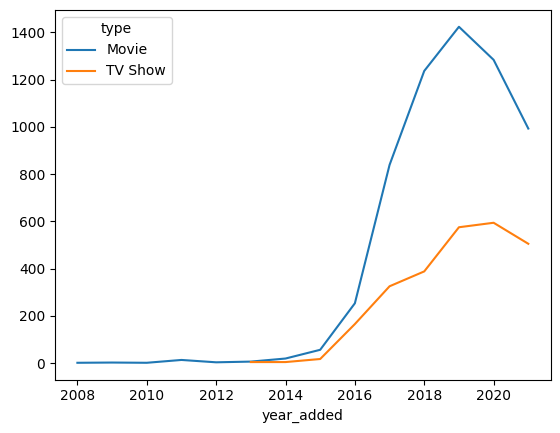

In [28]:
df.groupby(['year_added','type']).size().unstack().plot()

# Analysis Insight 4

# Netflix appears to be gradually shifting toward TV shows because series keep viewers engaged for a longer time. 
# Long-form content encourages binge-watching and helps retain subscriptions.



In [29]:
df['listed_in'].str.split(',')

0                                         [Documentaries]
1       [International TV Shows,  TV Dramas,  TV Myste...
2       [Crime TV Shows,  International TV Shows,  TV ...
3                               [Docuseries,  Reality TV]
4       [International TV Shows,  Romantic TV Shows,  ...
                              ...                        
8802                   [Cult Movies,  Dramas,  Thrillers]
8803           [Kids' TV,  Korean TV Shows,  TV Comedies]
8804                           [Comedies,  Horror Movies]
8805                [Children & Family Movies,  Comedies]
8806    [Dramas,  International Movies,  Music & Music...
Name: listed_in, Length: 8807, dtype: object

In [30]:
df_genre = df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')

In [31]:
df_genre.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021.0


In [32]:
df_genre['listed_in'].value_counts().head(10)

listed_in
 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: count, dtype: int64

# Analysis Insight 5
# The dominance of International Movies shows that Netflix is targeting a global audience. 
# By offering content from different countries, Netflix attracts viewers from multiple regions and increases its worldwide engagement.


# Key Business Insights

1. Movies are more common on Netflix than TV shows, showing that standalone content still dominates the platform.

2. The United States contributes the highest amount of content, indicating Netflix strongly depends on the U.S. entertainment industry.

3. Netflix adds more content in recent years, which suggests the platform continuously expands its library to attract and retain users.

4. Although movies dominate overall, TV shows have grown rapidly in recent years because series keep viewers engaged for longer periods.

5. The popularity of International Movies indicates that Netflix targets a global audience and focuses on expanding in multiple countries.

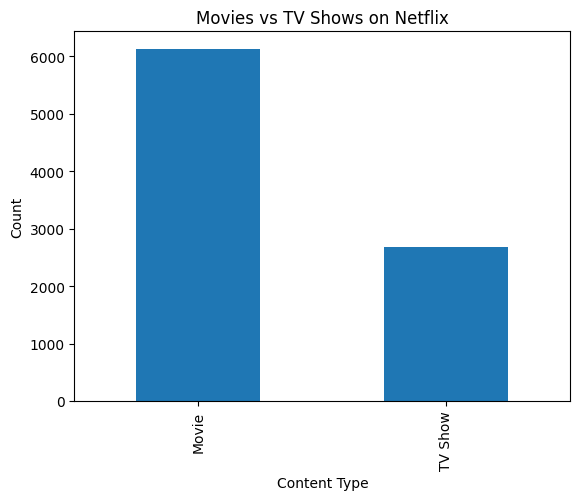

In [33]:
import matplotlib.pyplot as plt
df['type'].value_counts().plot(kind='bar')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.savefig("movies_vs_tvshows.png", bbox_inches='tight')
plt.show()

# This chart shows that movies are significantly more common than TV shows on Netflix, indicating that standalone content dominates the platform.


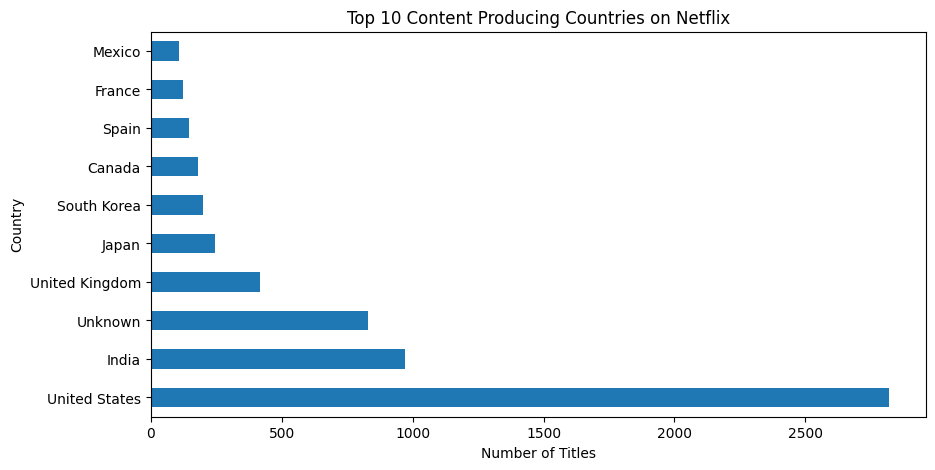

In [34]:
plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.savefig("Top_country.png", bbox_inches='tight')
plt.show()


# The bar chart shows that the United States contributes the highest number of titles on Netflix. 
# This indicates that Netflix heavily relies on the U.S. entertainment industry and Hollywood content for its platform.

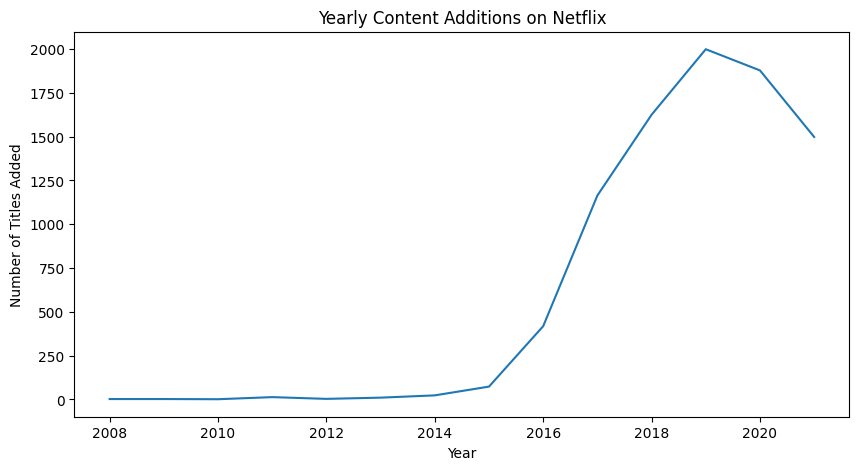

In [35]:
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title('Yearly Content Additions on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.savefig("Yearly_content_Trend.png", bbox_inches='tight')
plt.show()


# This line chart shows that the number of titles added to Netflix increased significantly in recent years. 
# It indicates that Netflix has rapidly expanded its content library to attract more users and remain competitive in the streaming market.


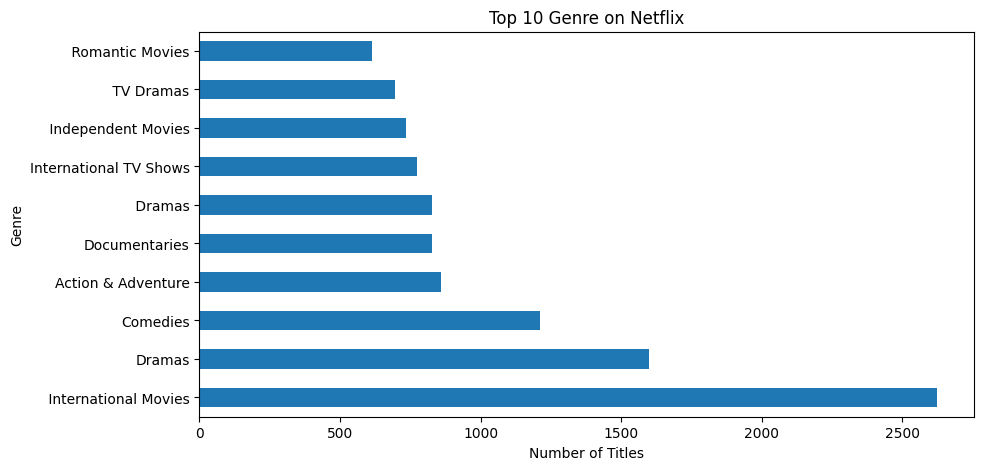

In [36]:
plt.figure(figsize=(10,5))
df_genre['listed_in'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Genre on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.savefig("Top_Genre.png", bbox_inches='tight')
plt.show()


# This chart shows that "International Movies" is the most common genre on Netflix. 
# It suggests that Netflix focuses on global content and aims to attract viewers from different countries and cultures.


# Conclusion

# This analysis shows Netflix relies heavily on U.S. content, but is expanding globally through international titles. 
# The platform is increasingly focusing on recent releases and long-form TV shows to improve user engagement and retention.
